<a href="https://colab.research.google.com/github/maliii326/def-recipt-generate/blob/main/Copy_of_Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

In [ ]:
tweets_df = pd.read_csv("/content/BlackFriday_tweets.csv")

In [ ]:
tweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,"['AI5W', 'Artist', 'postscript', 'art', 'ad', ...",Twitter for Android,False
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,NaN,Twitter Web App,False
2,Tks,NaN,Host of The K.Licious Show,2009-04-16 13:24:13+00:00,411,551,2318,False,2021-11-27 10:02:35+00:00,Hopefully Christmas works out. 🤷‍♀️🤯 who did s...,"['blackfriday', 'shopping']",Twitter for Android,False
3,Majestic Stratford,"Stratford-upon-Avon, UK",News and events from the team at Majestic Wine...,2009-08-08 19:39:40+00:00,1103,673,24,False,2021-11-27 10:02:21+00:00,Black Friday offers are still going! 25% off F...,"['blackfridaysale', 'blackfriday']",Twitter for iPhone,False
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,"['onedirection', 'Måneskin', 'etsy', 'niallhor...",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Charles Wasleski,"KC, MO","Dad, Brewer of beer, Tech-Savvy, Gamer Nerd, A...",2011-01-23 01:47:19+00:00,50,130,485,False,2021-11-26 23:52:52+00:00,Spending my #BlackFriday meeting new people. @...,"['BlackFriday', 'farscape']",Instagram,False
9996,Andrei Majewski,"London, England",I created @pomaoralcare - personalised oral ca...,2010-01-20 15:41:13+00:00,508,39,188,False,2021-11-26 23:52:51+00:00,So funny to see venture-backed DTCs throwing 6...,"['BlackFriday', 'dtc', 'shopify', 'd2c']",Twitter for iPhone,False
9997,Apparition 33,NaN,I like Heavy Metal and Video Games. I love Jes...,2020-08-21 21:20:52+00:00,790,1862,3406,False,2021-11-26 23:52:46+00:00,I went to Harrisburg mall in PA for #BlackFrid...,['BlackFriday'],Twitter for iPhone,False
9998,IamDallasLyn,PDX OR,#Resist #Queer #LGBTQIA \n#Art: @ArtsPouts\nYo...,2009-05-24 02:05:43+00:00,3646,4997,101437,False,2021-11-26 23:52:44+00:00,My most popular listing this week! \n#MileyCyr...,"['MileyCyrus', 'Art', 'FanArt', 'BlackFriday']",Twitter Web App,False


In [ ]:
print(f"data shape: {tweets_df.shape}")

data shape: (10000, 13)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         10000 non-null  object
 1   user_location     7072 non-null   object
 2   user_description  9469 non-null   object
 3   user_created      10000 non-null  object
 4   user_followers    10000 non-null  int64 
 5   user_friends      10000 non-null  int64 
 6   user_favourites   10000 non-null  int64 
 7   user_verified     10000 non-null  bool  
 8   date              10000 non-null  object
 9   text              10000 non-null  object
 10  hashtags          7724 non-null   object
 11  source            10000 non-null  object
 12  is_retweet        10000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB


In [ ]:
tweets_df.describe()

,user_followers,user_friends,user_favourites
count,1.000000e+04,10000.000000,10000.000000
mean,5.757594e+04,1988.893700,11860.863300
std,1.016800e+06,9923.544398,39258.598627
min,0.000000e+00,0.000000,0.000000
25%,9.500000e+01,132.000000,92.000000
50%,4.170000e+02,388.000000,1167.000000
75%,2.507250e+03,1325.250000,6496.000000
max,7.773544e+07,302499.000000,849358.000000


# missing values

In [ ]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,"['AI5W', 'Artist', 'postscript', 'art', 'ad', ...",Twitter for Android,False
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,NaN,Twitter Web App,False
2,Tks,NaN,Host of The K.Licious Show,2009-04-16 13:24:13+00:00,411,551,2318,False,2021-11-27 10:02:35+00:00,Hopefully Christmas works out. 🤷‍♀️🤯 who did s...,"['blackfriday', 'shopping']",Twitter for Android,False
3,Majestic Stratford,"Stratford-upon-Avon, UK",News and events from the team at Majestic Wine...,2009-08-08 19:39:40+00:00,1103,673,24,False,2021-11-27 10:02:21+00:00,Black Friday offers are still going! 25% off F...,"['blackfridaysale', 'blackfriday']",Twitter for iPhone,False
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,"['onedirection', 'Måneskin', 'etsy', 'niallhor...",Twitter for Android,False


In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,0,2928,531,0,0,0,0,0,0,0,2276,0,0
Percent,0,29.28,5.31,0,0,0,0,0,0,0,22.76,0,0
Types,object,object,object,object,int64,int64,int64,bool,object,object,object,object,bool


# **unique** **values**

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,10000,7072,9469,10000,10000,10000,10000,10000,10000,10000,7724,10000,10000
Uniques,6490,2785,6115,6514,2992,2495,4099,2,8075,9950,3656,176,1


# **most** **frequent** **values**

In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,10000,7072,9469,10000,10000,10000,10000,10000,10000,10000,7724,10000,10000
Most frequent item,canadianbestseller.com,United States,https://t.co/ZJK4Q3dy6l – Your Prime Discount ...,2019-10-26 02:56:57+00:00,95,335,11,False,2021-11-27 00:00:00+00:00,"Brand New Items for: Bitcoin, Ethereum, Liteco...",['BlackFriday'],Twitter Web App,False
Frequence,837,201,837,837,859,838,845,9520,19,8,1772,2446,10000
Percent from total,8.37,2.842,8.839,8.37,8.59,8.38,8.45,95.2,0.19,0.08,22.941,24.46,100


**Visualize** **the** **data** **distribution**

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

**User** **name**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127954 missing from current font.
  font.set_text(s, 0.0, flags=fla

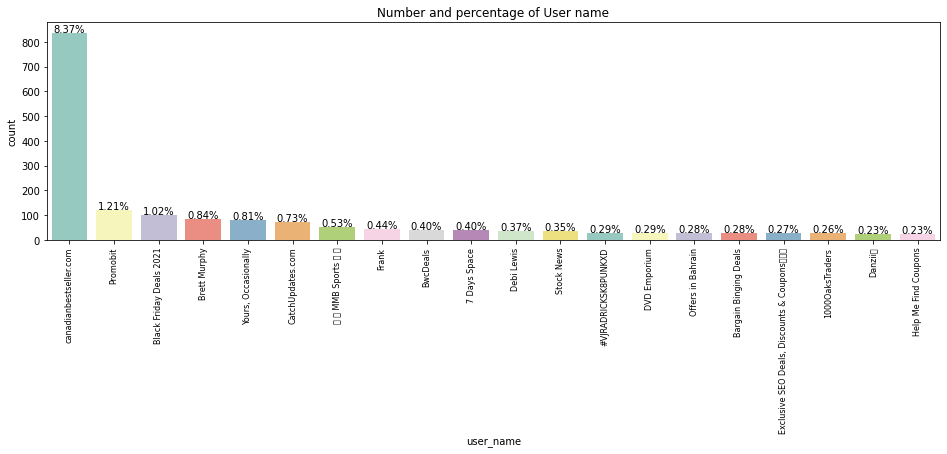

In [ ]:
plot_count("user_name", "User name", tweets_df,4)

**User** **location**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


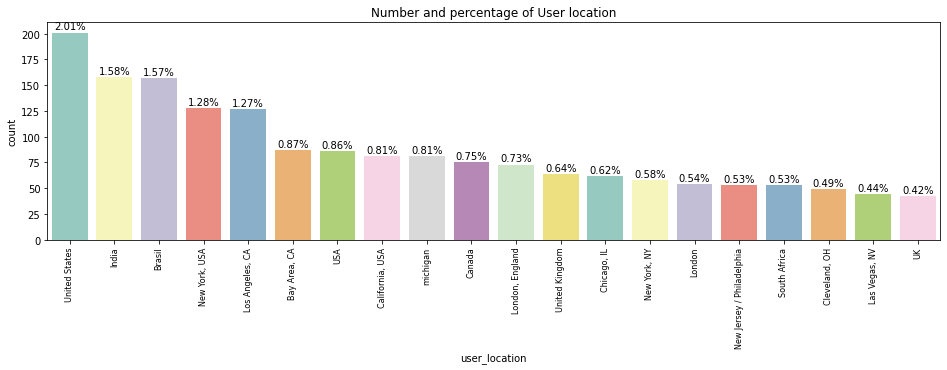

In [ ]:
plot_count("user_location", "User location", tweets_df,4)

**Tweet** **source**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


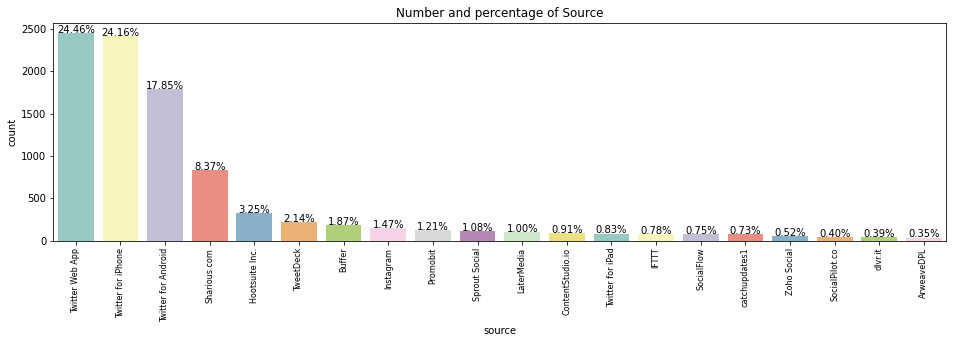

In [ ]:
plot_count("source", "Source", tweets_df,4)

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        plt.imshow(wordcloud)
    plt.show()


**Text** **wordcloauds**

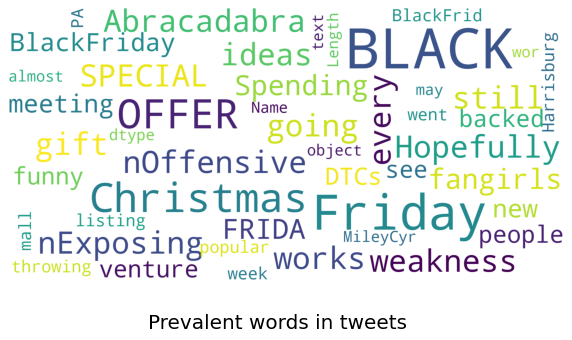

In [ ]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

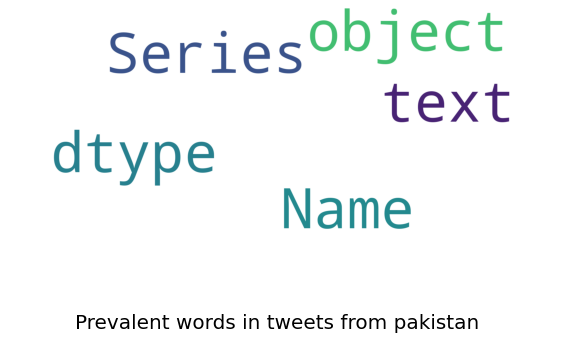

In [ ]:
pakistan_df = tweets_df.loc[tweets_df.user_location=="pakistan"]
show_wordcloud(pakistan_df['text'], title = 'Prevalent words in tweets from pakistan')

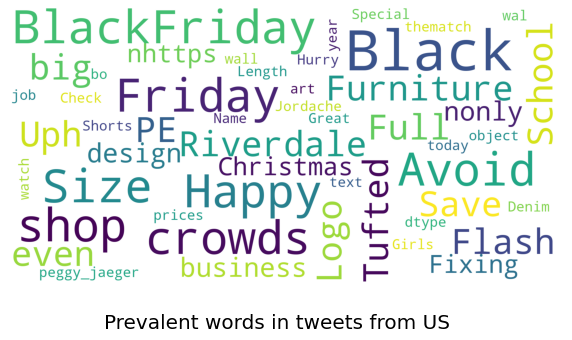

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

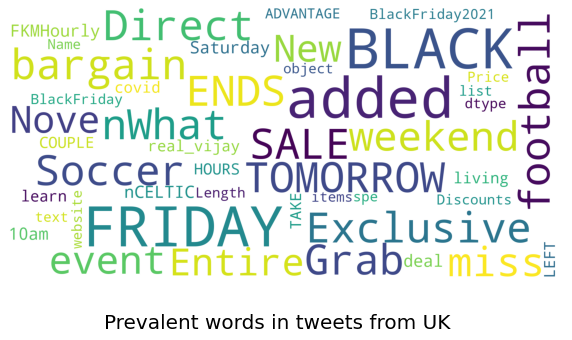

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

**Hashtags** **analysis**

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


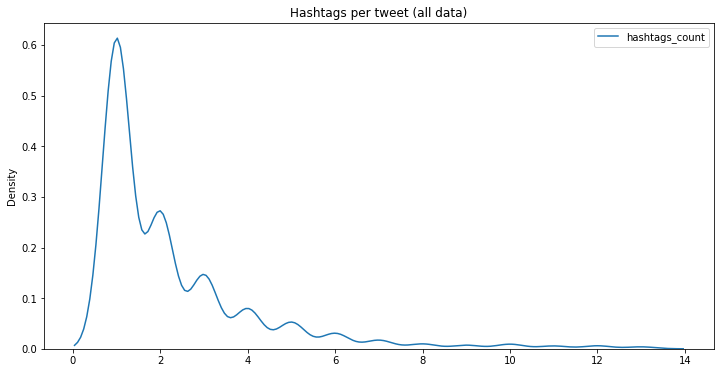

In [ ]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [ ]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 6346


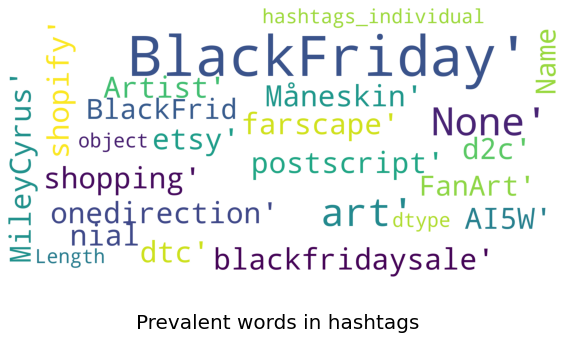

In [ ]:
show_wordcloud(tweets_df['hashtags_individual'], title = 'Prevalent words in hashtags')

In [ ]:
tweets_df['country'] = tweets_df['user_location']

In [ ]:
tweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,hashtags_count,hashtags_individual,country
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,"['AI5W', 'Artist', 'postscript', 'art', 'ad', ...",Twitter for Android,False,9,"[['AI5W', 'Artist', 'postscript', 'art', '...","Bakersfield, CA"
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,['None'],Twitter Web App,False,1,[['None']],World Wide Web
2,Tks,NaN,Host of The K.Licious Show,2009-04-16 13:24:13+00:00,411,551,2318,False,2021-11-27 10:02:35+00:00,Hopefully Christmas works out. 🤷‍♀️🤯 who did s...,"['blackfriday', 'shopping']",Twitter for Android,False,2,"[['blackfriday', 'shopping']]",NaN
3,Majestic Stratford,"Stratford-upon-Avon, UK",News and events from the team at Majestic Wine...,2009-08-08 19:39:40+00:00,1103,673,24,False,2021-11-27 10:02:21+00:00,Black Friday offers are still going! 25% off F...,"['blackfridaysale', 'blackfriday']",Twitter for iPhone,False,2,"[['blackfridaysale', 'blackfriday']]","Stratford-upon-Avon, UK"
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,"['onedirection', 'Måneskin', 'etsy', 'niallhor...",Twitter for Android,False,4,"[['onedirection', 'Måneskin', 'etsy', 'nial...",España
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Charles Wasleski,"KC, MO","Dad, Brewer of beer, Tech-Savvy, Gamer Nerd, A...",2011-01-23 01:47:19+00:00,50,130,485,False,2021-11-26 23:52:52+00:00,Spending my #BlackFriday meeting new people. @...,"['BlackFriday', 'farscape']",Instagram,False,2,"[['BlackFriday', 'farscape']]","KC, MO"
9996,Andrei Majewski,"London, England",I created @pomaoralcare - personalised oral ca...,2010-01-20 15:41:13+00:00,508,39,188,False,2021-11-26 23:52:51+00:00,So funny to see venture-backed DTCs throwing 6...,"['BlackFriday', 'dtc', 'shopify', 'd2c']",Twitter for iPhone,False,4,"[['BlackFriday', 'dtc', 'shopify', 'd2c']]","London, England"
9997,Apparition 33,NaN,I like Heavy Metal and Video Games. I love Jes...,2020-08-21 21:20:52+00:00,790,1862,3406,False,2021-11-26 23:52:46+00:00,I went to Harrisburg mall in PA for #BlackFrid...,['BlackFriday'],Twitter for iPhone,False,1,[['BlackFriday']],NaN
9998,IamDallasLyn,PDX OR,#Resist #Queer #LGBTQIA \n#Art: @ArtsPouts\nYo...,2009-05-24 02:05:43+00:00,3646,4997,101437,False,2021-11-26 23:52:44+00:00,My most popular listing this week! \n#MileyCyr...,"['MileyCyrus', 'Art', 'FanArt', 'BlackFriday']",Twitter Web App,False,4,"[['MileyCyrus', 'Art', 'FanArt', 'BlackFrid...",PDX OR
